<font color="white">.</font> | <font color="white">.</font> | <font color="white">.</font>
-- | -- | --
![NASA](http://www.nasa.gov/sites/all/themes/custom/nasatwo/images/nasa-logo.svg) | <h1><font size="+3">ASTG Python Courses</font></h1> | ![NASA](https://www.nccs.nasa.gov/sites/default/files/NCCS_Logo_0.png)

---

<center><h1><font color="red" size="+3">Introduction to Xarray</font></h1></center>

## <font color="red">Useful References</font>
- <a href="http://xarray.pydata.org/en/stable/"> xarray</a>
- <a href="https://openresearchsoftware.metajnl.com/articles/10.5334/jors.148/"> xarray: N-D labeled arrays and datasets in Python</a>
- <a href="https://nbviewer.jupyter.org/github/mccrayc/tutorials/blob/master/2_reanalysis/CFSR_Data_Tutorial.ipynb">Importing and mapping reanalysis data with xarray and cartopy</a>
- <a href="https://openresearchsoftware.metajnl.com/articles/10.5334/jors.148/">xarray: N-D labeled Arrays and Datasets in Python</a>
- <a href="https://www.earthdatascience.org/courses/use-data-open-source-python/hierarchical-data-formats-hdf/use-netcdf-in-python-xarray/">How to Open and Process NetCDF 4 Data Format in Open Source Python</a>
- <a href="https://cbrownley.wordpress.com/tag/xarray/">Visualizing Global Land Temperatures in Python with scrapy, xarray, and cartopy</a>

![fig_logo](http://xarray.pydata.org/en/stable/_static/dataset-diagram-logo.png)
Image Source: xarray.pydata.org

## <font color="red">What is Xarray?</font>
+ `Xarray` is an open source project and Python package that makes working with labelled multi-dimensional arrays simple and efficient.
+ Introduces labels in the form of dimensions, coordinates and attributes on top of raw `NumPy`-like arrays, which allows for a more intuitive, more concise, and less error-prone developer experience. 
+ Is inspired by and borrows heavily from `Pandas`.
+ Builds on top of, and seamlessly interoperates with, the core scientific Python packages, such as NumPy, SciPy, Matplotlib, and Pandas
+ Is particularly tailored to working with `netCDF` files and integrates tightly with `Dask` for parallel computing.

## <font color="red">Implementation and architecture</font>
- NetCDF forms the basis of the Xarray data model and provides a natural and portable serialization format. 
- Xarray features two main data structures: 
     - **DataArray** xarray’s implementation of a labeled, multi-dimensional array. It has several key properties:
          - *data*: N-dimensional array (NumPy or dask) holding the array's values,
          - *coords*: dict-like container of arrays (coordinates) that label each point (e.g., 1-dimensional arrays of numbers, datetime objects or strings),
          - *dims*: dimension names for each axis [e.g., (‘time’, ‘latitude’, ‘longitude’)],
          - *attrs*: OrderedDict holding arbitrary metadata (e.g. units or descriptions), and
          - *name*: an arbitrary name for the array.
     - **Dataset**: xarray’s multi-dimensional equivalent of a DataFrame. It is a dict-like container of labeled arrays (DataArrays) with aligned dimensions. It is designed as an in-memory representation of a netCDF dataset. In addition to the dict-like interface of the dataset itself, which can be used to access any DataArray in a Dataset, datasets have four key properties:
          - *data_vars*: OrderedDict of DataArray objects corresponding to data variables,
          - *coords*: OrderedDict of DataArray objects intended to label points used in data_vars (e.g., 1-dimensional arrays of numbers, datetime objects or strings),
          - *dims*: dictionary mapping from dimension names to the fixed length of each dimension (e.g., {‘x’: 6, ‘y’: 6, ‘time’: 8}), and
          - *attrs*: OrderedDict to hold arbitrary metadata pertaining to the dataset.

![fig_structure](https://openresearchsoftware.metajnl.com/articles/10.5334/jors.148/jors-5-148-g2.png)
Image Source: openresearchsoftware.metajnl.com


## <font color="red">Core xarray Features</font>

- <u>*Serialization and I/O*</u>: xarray supports direct serialization and I/O to several file formats including pickle, netCDF, OPeNDAP (read-only), GRIB1/2 (read-only), and HDF by integrating with third-party libraries.
- <u>*Metadata*</u>: Keep track of arbitrary metadata in the form of a Python dictionary. `x.attrs`.
- <u>*Label-based indexing*</u>: Similarly to Pandas objects, xarray objects support both integer- and label-based lookups along each dimension. However, xarray objects also have named dimensions, so you can optionally use dimension names instead of relying on the positional ordering of dimensions. `x.loc['2014-01-01']` or `x.sel(time='2014-01-01')`
- <u>*Arithmetic*</u>: arithmetic between xarray objects vectorizes based on dimension names, automatically looping (broadcasting) over each distinct dimension. This eliminates the need to insert dummy dimensions of size one to facilitate broadcasting, a common pattern with NumPy.
- <u>*Aggregation*</u>: calculation of statistics (e.g. sum) along a dimension of an xarray object can be done by dimension name instead of an integer axis number. `x.sum('time')`
- <u>*Plotting*</u>: Plotting functionality is a thin wrapper around Matplotlib. The syntax and function names from Matplotlib are used whenever possible, resulting in a seamless transition between the two.
- <u>*Missing Data*</u>: Are smoothly handled in all operations, including arithmetic, alignment and aggregation.
- <u>*Interactivity with Pandas*</u>: xarray objects seamlessly to convert to and from pandas objects to interact with the rest of the PyData ecosystem.
- <u>*Out-of-core computation*</u>: xarray’s data structures can be backed by dask to support parallel and streaming computation on data that does not fit into memory, up to 100s of GB or TBs in size. 
- <u>*Alignment*</u>: Support of  database-like join operations for combining xarray objects along common coordinates.
- <u>*Split-apply-combine*</u>: xarray includes N-dimensional grouped operations implementing the split-apply-combine strategy. `x.groupby('time.dayofyear').mean()`
- <u>*Resampling and rolling window operations*</u>: Utilizing the efficient resampling methods from Pandas and rolling window operations from Bottleneck, xarray offers a robust set of resampling and rolling window operations along a single dimension.

## <font color="red">Supported File Types</font>

`Xarray`  supports direct serialization and IO to several file formats:

- Pickle
- netCDF 3/4 format (recommended)
- RaterIO
- Zarr: a Python package providing an implementation of chunked, compressed, N-dimensional arrays. Zarr has the ability to store arrays in a range of ways, including in memory, in files, and in cloud-based object storage such as Amazon S3 and Google Cloud Storage. 
- GRIB format: thereading of GRIB files is done using the ECMWF `cgrib` Python driver (`engine='cfgrib'` as argument of `open_dataset`).
- Xarray can read GRIB, HDF4 and other file formats supported by PyNIO (`engine='pynio'` as argument of `open_dataset`).
- Xarray can also read HDF5 files (using netCDF4 first) but can only access variables within groups.

---

### <font color='red'> Only run the following cell if you are on Google Colab</font>

Uncomment the cell below if you are on Google Colab. Unfortunately this might no longer work.

In [ ]:
#!apt-get install libproj-dev proj-data proj-bin
#!apt-get install libgeos-dev
#!pip install cython
#!pip install cartopy
#!pip install netCDF4

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shapereader

In [15]:
import numpy as np
import pandas as pd
import xarray as xr
print("Version of Xarray: ", xr.__version__)

Version of Xarray:  0.16.2


## <font color='red'>Basic Manipulations</font> 

### <font color='blue'>Xarray DataArray</font>

- Xarray’s implementation of a labeled, multi-dimensional array.
- Has several key properties:
    - `values`: a numpy.ndarray holding the array’s values
    - `dims`: dimension names for each axis (e.g., `('x', 'y', 'z')`)
    - `coords`: a dict-like container of arrays (coordinates) that label each point (e.g., 1-dimensional arrays of numbers, datetime objects or strings)
    - `attrs`: dict to hold arbitrary metadata (attributes)
    
- Xarray uses `dims` and `coords` to enable its core metadata aware operations. 
- Dimensions provide names that xarray uses instead of the `axis` argument found in many numpy functions. 
- Coordinates enable fast label based indexing and alignment, building on the functionality of the `index` found on a Pandas `DataFrame` or `Series`.

**Creating a DataArray**

In [ ]:
list_data = [[11.0, 12.0, 13.0, 14.0, 15.0], 
             [21.0, 22.0, 23.0, 24.0, 25.0],
             [31.0, 32.0, 33.0, 34.0, 35.0],
             [41.0, 42.0, 43.0, 44.0, 45]]

print(type(list_data))
print(list_data)

In [ ]:
np_data = np.array(list_data)
print(type(np_data))
print(np_data)

In [ ]:
xr_data = xr.DataArray(np_data)
print(type(xr_data))
print(xr_data)

We can create a 2D array, assigned the names `x` and `y` to the two dimensions respectively and associated two coordinate labels `10`, `20`, `30` and `40` with the two locations along the `x` dimension:

In [ ]:
xr_data = xr.DataArray(np_data, 
                       dims=("x", "y"), 
                       coords={"x": [10, 20, 30, 40]})
print(xr_data)

We can also extract the properties of the DataArray.

Get the values:

In [ ]:
xr_data.values

Get the dimension labels:

In [ ]:
xr_data.dims

Get the coordinates:

In [ ]:
xr_data.coords

Get values of the dimension `x`:

In [ ]:
xr_data['x'].values

In [ ]:
xr_data.x.values

**Indexing**

- Xarray supports four kinds of indexing.

Positional and by integer label, like Numpy:

In [ ]:
xr_data[2,:]

`loc` or "location": positional and coordinate label, like Pandas:

In [ ]:
xr_data.loc[30]

`isel` or "integer select":  by dimension name and integer label

In [ ]:
xr_data.isel(x=2)

`sel` or "select": by dimension name and coordinate label

In [ ]:
xr_data.sel(x=30)

- Unlike positional indexing, label-based indexing frees us from having to know how our array is organized. 
- All we need to know are the dimension name and the label we wish to index i.e. `data.sel(x=30)` works regardless of whether `x` is the first or second dimension of the array and regardless of whether `30` is the first or second element of `x`. 
- We have already told xarray that `x` is the first dimension when we created data: Xarray keeps track of this so we don’t have to.

#### Attributes

- We can add metadata attributes that can be use later for data manipulation and visualization.

In [ ]:
xr_data.attrs["long_name"] = "random temperature"
xr_data.attrs["units"] = "C"

In [ ]:
xr_data.attrs

You can also add metadata to coordinate:

In [ ]:
xr_data.x.attrs["units"] = "x units"

#### Computations

- DataArrays work similarly to Numpy arrays:

We can scale and offset:

In [ ]:
xr_data + 0.5

We can use Numpy built-in functions:

In [ ]:
np.exp(-0.25*xr_data)

We can use `where()` to conditionally switch between values:

In [ ]:
xr.where(xr_data > 20, '> 20', '< 20')

We can take the transpose:

In [ ]:
xr_data.T

We can sum all the entries:

In [ ]:
xr_data.sum()

Aggregation operations can use dimension names instead of axis numbers:

In [ ]:
xr_data.mean(dim="x")

In [ ]:
xr_data.mean(dim="y")

- Arithmetic operations broadcast are based on dimension name. 
- You don not need to insert dummy dimensions for alignment.

In [ ]:
a = xr.DataArray(np.random.random(5), [xr_data.coords["y"]])
a

In [ ]:
b = xr.DataArray(np.random.random(6), dims="z")
b

In [ ]:
a+b

In [ ]:
b+a

You may not need to worry about the order of dimensions:

In [ ]:
xr_data - xr_data.T

Operations also align based on index labels:

In [ ]:
xr_data[:-1] - xr_data[:1]

**Interpolation**

In [ ]:
xr_data.interp(x=25)

**Plotting**

- We can use a Pandas-like call to visualize the data.
- The labeling is automatically done.

In [ ]:
xr_data.plot()

**Going to Pandas**

Xarray objects can be easily converted to and from Pandas objects using the `to_series()`, `to_dataframe()` and `to_xarray()` methods:

In [ ]:
pd_series = xr_data.to_series()
pd_series

In [ ]:
pd_series.to_xarray()

### <font color='blue'>Xarray Datasets</font>

- `xarray.Dataset` is a dict-like container of aligned DataArray objects. 
- It can be seen as a multi-dimensional generalization of the `pandas.DataFrame`.
- Variables in datasets can have different `dtype` and even different dimensions.
- All dimensions are assumed to refer to points in the same shared coordinate system:
     - If two variables have dimension `x`, that dimension must be identical in both variables.

We can create a dataset with three `DataArrays` named `da_1`, `da_2` and `da_3`.

In [ ]:
xr_dst = xr.Dataset({"da_1": xr_data, 
                     "da_2": ("x", [1, 2, 3, 4]), 
                     "da_3": np.pi})
xr_dst

We can use the dictionary or dot indexing to pull out `Dataset` variables as `DataArray` objects: 

In [ ]:
xr_dst["da_1"]

In [ ]:
xr_dst.da_2

Xarray automatically aligns `da_2` with `DataArray` `da_1`: they share the same coordinate system so that `xr_dst.da_1['x'] == xr_dst.da_s['x'] == xr_dst['x']`.

In [ ]:
xr_dst.da_1.sel(x=10)

In [ ]:
xr_dst.da_2.sel(x=10)

We can save the dataset in a netCDF file:

In [ ]:
xr_dst.to_netcdf("sample_netcdf.nc")

In [ ]:
with xr.open_dataset("sample_netcdf.nc") as fid:
     print(fid.keys())

## <font color='red'>Manipulating a netCDF File</font> 

- We will manipulate NOAA NCEP Reanalysis data.
- The reanalysis project uses an analysis/forecast system to perform data assimilation using past data from 1948 to the present.
- Spatial coverage: 2.5 degree latitude x 2.5 degree longitude global grid (144x73).
- It produces outputs 4 times per day.
- Here, we will focus on surface air temperature for 2018: 4x365 = 1460 records.

In [ ]:
url = "http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/surface/air.sig995.2018.nc"
ds = xr.open_dataset(url)

In [ ]:
ds.keys()

In [ ]:
dts_attribute = ds.attrs
dts_attribute

In [ ]:
dts_attribute['References']

### <font color='blue'>Work With the NetCDF Data Structure </font>

- An Xarray contains metadata making it self-describing. 
- There are three dimensions to consider when working with this data which represent the x,y and z dimensions of the data: latitude/longitude/time.
- This particular dataset contains global time series of surface air temperatures for 2018.

**Get the Air Temperature dataset**

In [ ]:
air_temp2D = ds.air
air_temp2D

**Get latitude/longitude information**

Latitude values:

In [ ]:
air_temp2D['lat'].values

In [ ]:
air_temp2D['lat'].attrs

Minimum/Maximum latidtude and longitude:

In [ ]:
print("The min and max latitude values in the data is:", 
      air_temp2D['lat'].values.min(), air_temp2D['lat'].values.max())

In [ ]:
print("The min and max longitude values in the data is:", 
      air_temp2D['lon'].values.min(), air_temp2D['lon'].values.max())

**Get the time information**

In [ ]:
air_temp2D["time"].values

In [ ]:
print("The earliest date in the data is:", air_temp2D["time"].values.min())
print("The latest   date in the data is:", air_temp2D["time"].values.max())  

In [ ]:
print(type(air_temp2D["time"].values))
print(air_temp2D["time"].values.shape)

**Self describing dataset**

In [ ]:
metadata = air_temp2D.attrs
metadata

In [ ]:
print(metadata['units'])

**Slicing the data**

Select a single x, y combination from the data:

In [ ]:
key = 50
longitude = air_temp2D["lon"].values[key]
latitude = air_temp2D["lat"].values[key]

print("Longitude = {} \n Latitude = {}".format(longitude, latitude))

In [ ]:
fig = plt.figure(figsize=(12, 9))
map_projection = ccrs.PlateCarree()
data_transform = ccrs.PlateCarree()

ax = plt.axes(projection=map_projection)
ax.stock_img()

# Plot the selected location 
plt.plot([longitude], [latitude], 'r*', 
        transform=data_transform,
        color="purple", 
         markersize=10)

ax.set(title="Location of the Latitude/Longitude Being Used to Slice Your netcdf Climate Data File")

In [ ]:
one_point = air_temp2D.sel(lat=latitude, lon=longitude)
one_point

- When you slice the data by a single point, the output data only has a single array of values. 
- The values represent air temperature (in K) over time.

In [ ]:
one_point.shape

We can get the first few values:

In [ ]:
one_point.values[:5]

**Time series plot at a single location**

In [ ]:
one_point.plot.line()

You can make the plot a bit prettier by using the Matplotlib plot parameters.

In [ ]:
f, ax = plt.subplots(figsize=(12, 6))
one_point.plot.line(hue='lat', marker="o", ax=ax, color="grey",
                    markerfacecolor="purple",
                    markeredgecolor="purple")
ax.set(title="Time Series For a Single Lat/Lon Location")

### <font color='blue'> Slice the Data By Time and Location</font>
- We want to slice the data at a selected lat/lon location and for the months of April to June.

In [ ]:
start_date = "2018-04-01"
end_date = "2018-06-30"
temp_apr_jun = air_temp2D.sel(time=slice(start_date, end_date),
                            lat=latitude, lon=longitude)
temp_apr_jun

In [ ]:
print(temp_apr_jun.shape)

We can plot the data:

In [ ]:
# Plot the data just like you did above
f, ax = plt.subplots(figsize=(12, 6))
temp_apr_jun.plot.line(hue='lat',marker="o", ax=ax, color="grey",
                       markerfacecolor="purple",
                       markeredgecolor="purple")
ax.set(title="April-June Time Series of Temperature Data For A Single Location")

### <font color='blue'> Time series at specific latitudes and alon a longitude line</font>

- We can use line plots to check the variation of air temperature at three different latitudes along a longitude line:

In [ ]:
air_temp2D.isel(lon=10, lat=[19, 21, 22]).plot.line(x="time")

### <font color='blue'> Slice The Data Across a Spatial Extent For A Specific Time Period</font>

- We use `.sel()` combined with `slice()` to subset the data.

In [ ]:
start_date = "2018-04-01"
end_date = "2018-04-01"
one_day_data = air_temp2D.sel(time=slice(start_date, end_date))
one_day_data

In [ ]:
one_day_data.shape

When we call `.plot()` on the data, the default plot is a histogram representing the range of raster pixel values in your data for all time periods (3 months in this case).

In [ ]:
one_day_data.plot()

### <font color='blue'>Spatial Plots</font>
- If you want to plot the data spatially as a raster, you can use `.plot()` but specify the lon and lat values as the x and y dimensions to plot. 
- You can add the following parameters to your .plot() call to make sure each time step in your data plots spatially:
    - `col_wrap=`: adjust how how many columns the each subplot is spread across 
    - `col=`: what dimension is being plotted in each subplot.

Here, we want a single raster for each time record in the data so you specify `col='time'`. `col_wrap=2` forces the plots to be on two columns.

In [ ]:
one_day_data.plot(x="lon",
                  y="lat",
                  col="time",
                  col_wrap=2)
plt.suptitle("One day Air Temp", y = 1.05)

**We can plot with Cartopy map projection:**

In [ ]:
map_projection = ccrs.PlateCarree()
data_transform = ccrs.PlateCarree()

aspect = one_day_data.shape[2] / one_day_data.shape[1]

p = one_day_data.plot(transform=data_transform,  # the data's projection
                      col='time', col_wrap=2,
                      aspect=aspect,
                      figsize=(10, 10),
                      subplot_kws={'projection': map_projection})  # the plot's projection

for ax in p.axes.flat:
    ax.coastlines()
    #ax.set_extent(extent)

plt.suptitle("One day Air Temp", y = 1.0)

We can use Cartopy only to do the countour plot:

In [ ]:
plt.rcParams["figure.figsize"] = [15, 12]
fig = plt.figure(tight_layout=False)
nrows, ncols = 2, 2
for i in range(4):
    ax = fig.add_subplot(nrows, ncols, i+1, projection=map_projection)
    one_day_data[i].plot()
    ax.coastlines()

In [ ]:
import cartopy.util

plt.rcParams["figure.figsize"] = [15, 12]
fig = plt.figure(tight_layout=False)
nrows, ncols = 2, 2
#fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
#ax = axes.ravel()

for i in range(4):
    ax = fig.add_subplot(nrows, ncols, i+1, projection=map_projection)
    data = one_day_data[i].values
    lats = one_day_data[i]['lat'].values
    lons = one_day_data[i]['lon'].values

    data, lons = cartopy.util.add_cyclic_point(data, coord=lons)
    cp = plt.contourf(lons, lats, data, 60,
                      cmap='jet', transform=ccrs.PlateCarree())
    ax.coastlines()
    title = f'Time = {str(one_day_data[i].time.values)[0:19]}'
    ax.set_title(title)

# add a subplot for vertical colorbar
bottom, top = 0.1, 0.9
left, right = 0.1, 0.8
fig.subplots_adjust(top=top, bottom=bottom, 
                    left=left, right=right, hspace=0.15, wspace=0.25)
cbar_ax = fig.add_axes([0.85, bottom, 0.05, top-bottom])
fig.colorbar(cp, cax=cbar_ax)  # plot colorbar

### <font color='blue'> Perform Correlation Analysis</font>

Group the dataset by month:

In [ ]:
grp_air_temp  = air_temp2D.groupby('time.month')

In [ ]:
grp_air_temp

Compute the monthly climatologies:

In [ ]:
air_temp_clim = grp_air_temp.mean(dim='time')

In [ ]:
air_temp_clim

Compute the anomaly:

In [ ]:
air_temp_anom = grp_air_temp - air_temp_clim

In [ ]:
air_temp_anom

Plot the anomaly for the first time record:

In [ ]:
air_temp_anom[0].plot()

Plot anomaly time series at a specific location:

In [ ]:
air_temp_ref = air_temp_anom.sel(lon=200, lat=0, method='nearest')
air_temp_ref.plot()

In [ ]:
def covariance(x, y, dims=None):
    return xr.dot(x - x.mean(dims), y - y.mean(dims), dims=dims) / x.count(dims)

def corrrelation(x, y, dims=None):
    return covariance(x, y, dims) / (x.std(dims) * y.std(dims))

In [ ]:
air_temp_cor = corrrelation(air_temp_anom, air_temp_ref, dims='time')
pc = air_temp_cor.plot()
pc.axes.set_title('Correlation btw. global airTemp Anomaly and airTemp Anomaly at one point')

Determine the the time series spatial means:

In [ ]:
air_temp_anom_avg = air_temp_anom.mean(dim=['lat', 'lon'])
air_temp_anom_avg

In [ ]:
air_temp_anom_avg.plot()

Interpolation using datetime strings:

In [ ]:
#inter_data = air_temp.interp(time=["2018-03-15", "2018-03-16"])

### <font color='blue'>Manipulating 3D Field </font>

Download the netCDF file:

In [4]:
import urllib.request
url = 'https://downloads.psl.noaa.gov/Datasets/ncep.reanalysis.dailyavgs/pressure/air.2020.nc'
fname = "air_temp_2020.nc"
urllib.request.urlretrieve(url, fname)

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1056)>

Access the file:

In [5]:
xds = xr.open_dataset(fname)
xds

<xarray.Dataset>
Dimensions:    (lat: 73, level: 17, lon: 144, nbnds: 2, time: 366)
Coordinates:
  * level      (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat        (lat) float32 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time       (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2020-12-31
Dimensions without coordinates: nbnds
Data variables:
    air        (time, level, lat, lon) float32 ...
    time_bnds  (time, nbnds) float64 ...
Attributes:
    Conventions:    COARDS
    title:          mean daily NMC reanalysis (2014)
    history:        created 2013/12 by Hoop (netCDF2.3)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

List all the dimension values:

In [ ]:
xds.level.values

In [ ]:
xds.lon.values

In [ ]:
xds.lat.values

Get the 3D temperature:

In [6]:
air_temp3D = xds.air

Time series plots at `600 mb`, `25.0` degree longitude and at three latitudes:

In [ ]:
air_temp3D.sel(level=600., lon=25.0).isel(lat=[19, 21, 22]).plot.line(x="time");

What happens if I what to do the same plot at longitude `24.5`?

In [ ]:
air_temp3D.sel(level=600., lon=24.5).isel(lat=[19, 21, 22]).plot.line(x="time");

We need to perform an interpolation:

In [ ]:
air_temp3D.sel(level=600.).isel(lat=[19, 21, 22]).interp(lon=24.5).plot.line(x="time");

Get monthly means:

In [ ]:
monthly_air_temp3D = air_temp3D.groupby('time.month').mean(dim='time')

In [ ]:
monthly_air_temp3D.sel(level='1000.0').plot(x="lon", y="lat",
                                           col="month",
                                           col_wrap=4)

Annual Mean: Contour plot at each vertical level:

In [ ]:
air_temp3D.mean(dim='time').plot(x="lon", y="lat",
                                           col="level",
                                           col_wrap=4)

Perform the Zonal Mean Height plot:

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 12))
air_temp3D.mean(dim='time').mean(dim='lon').plot(ax=ax, 
                                                 x='lat', 
                                                 y='level')
ax.set_xlabel('Latitude')
ax.set_ylabel('Vertical Level')

---

## <font color='red'> Exercise</font>

Modify the code shown in:

[https://www.nccs.nasa.gov/nccs-users/instructional/adapt-instructional/python/xarray-generating-climatology-dataset-using-CMIP6](https://www.nccs.nasa.gov/nccs-users/instructional/adapt-instructional/python/xarray-generating-climatology-dataset-using-CMIP6)

to reproduce the plot.


---

## <font color='red'>Reading multiple netCDF Files</font> 

In [ ]:
url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/surface'
byear = 2017
eyear = 2019
files = ['{0}/air.sig995.{1:04d}.nc'.format(url, years) for years in range(byear,eyear,1)]

In [ ]:
ds = xr.open_mfdataset(files)
print(ds)

In [ ]:
dst_airT = ds.air
dst_airT

**Select data for a given time range:**

In [ ]:
air_temp2017 = dst_airT.sel(time=slice("2017-01-01", "2017-12-31"))
air_temp2017

**Compute the daily means:**

In [ ]:
daily_dst = dst_airT.resample(time='1D').mean()
daily_dst

Time series plot at Greenbelt, MD location:

In [ ]:
lat_ref =  39.00
lon_ref = -76.88
daily_dst_ref = daily_dst.sel(lon=lon_ref, lat=lat_ref, method='nearest')
daily_dst_ref.to_pandas().T.plot()
units = dst_airT.attrs['units']
plt.ylabel(f"Air Temperature ({units})")
plt.title('Time series plot for Greenbelt');

**Compute the monthly means:**

In [ ]:
monthly_dst = dst_airT.resample(time='1M').mean()
monthly_dst

**Compute the annual means:**

In [ ]:
yearly_dst = dst_airT.resample(time='1A').mean()
yearly_dst

In [ ]:
yearly_dst.plot(x="lon", y="lat",
                col="time", col_wrap=2)
plt.suptitle("Yearly Means", y = 1.05)

**Compute seasonal values:**

For seasons `JFM`, `AMJ`, `JAS` and `OND`:

In [ ]:
JFM_dst = dst_airT.resample(time='QS-JAN').mean()
JFM_dst

In [ ]:
JFM_dst.plot(x="lon", y="lat", col="time", col_wrap=3)
plt.suptitle("Seasonal Means (JFM, AMJ, JAS, OND)", y = 1.05)

For seasons `DJF`, `MAM`, `JJA` and `SON`:

In [ ]:
DJF_dst = dst_airT.resample(time='QS-DEC').mean()
DJF_dst

Or you can use the following for the seasons `DJF`, `MAM`, `JJA`, `SON`:

In [ ]:
DJF_dst2 = dst_airT.groupby('time.season').mean()

In [ ]:
DJF_dst.plot(x="lon", y="lat", col="time", col_wrap=3)
plt.suptitle("Seasonal Means (DJF, MAM, JJA, SON)", y = 1.05)

---

## <font color='red'>Using `Pandas DataFrames`</font> 

- We use web scrapping to access the <a href="https://neo.sci.gsfc.nasa.gov/">NASA Earth Observations (NEO)</a> website to obtain the AOT measurements for a given range of days (from 2000 to present).
- For each daily reading, we create a `Pandas DataFrame` that is use to create a `Xarray DataArray`.

In [ ]:
import requests as reqs
from bs4 import BeautifulSoup as bso

**Select the day range of interest:**

In [ ]:
beg_date = '2019-01-01'
end_date = '2019-12-21'

datasetID = 'MODAL2_M_AER_OD'

In [ ]:
def generate_dates(beg_date, end_date, freq='D'):
    """
      Create a list containing all the dates between
      beg_date and end_date.
      
      Input parameters:
         - beg_date: (str) start date in the format YYYY-MM-DD
         - end_date: (str) end   date in the format YYYY-MM-DD
         - freq: (str) frequency - 'D' for days and 'M' for months
      Returned value:
         - a list of dates in the format YYYY-MM-DD
    """
    pd_series = pd.date_range(start=beg_date, end=end_date, freq=freq)
    list_dates = [dt.strftime('%Y-%m-%d') for dt in pd_series]
    return list_dates

In [ ]:
def generate_urls(datasetID, list_dates):
    """
      Create a list containing the urls for the websites we
      want to access to grab the full addresses of the CVS files
      (that have the mesurements).
      
      Input parameters:
         - datasetID: (str) dataset identifier for the data of interest
         - list_dates: (list) list of dates of interest
      Returned value:
         - a list of urls
    """
    url = 'https://neo.sci.gsfc.nasa.gov/view.php?datasetId='
    url_base = url+datasetID+'&year='
    list_urls = [url_base+dt for dt in list_dates]
    return list_urls

In [ ]:
dates = generate_dates(beg_date, end_date, freq='D')
urls = generate_urls(datasetID, dates)

**Parse each website to obtain the location of the CSV files (conatining measurements):**

In [ ]:
csv_urls = list()
for url in urls:
    source = reqs.get(url)
    mysoup = bso(source.text, 'html.parser')
    href_tags = mysoup.find_all(href=True)
    for tag in href_tags:
        loc_url = tag["href"]
        if "CSV" in loc_url:
            csv_urls.append(loc_url)
            break

print(len(csv_urls), len(urls), len(dates))

**Read all the CSV files and create a Xarray DataSet:**

In [ ]:
das = list()
dts = list()
for i, csv_file in enumerate(csv_urls):
    dts.append(pd.to_datetime(dates[i]))
        
    df = pd.read_csv(csv_file, index_col=0, na_values=99999.0)
    da = xr.DataArray(df.values, 
                      coords=[[float(lat) for lat in df.index], 
                              [float(lon) for lon in df.columns]],
                      dims=['latitude', 'longitude'])
    
    das.append(da)

xr_dst = xr.concat(das, pd.Index(dts, name='date'))

In [ ]:
xr_dst

**Plotting**

First thirty days:

In [ ]:
thirtydays = xr_dst[0:31]
thirtydays.plot(x="longitude", y="latitude",
                col="date", col_wrap=3)

Average over the first thirty days:

In [ ]:
thirtydays.mean(dim='date').plot(figsize=(10, 6), cmap='RdBu_r');

Zoom in over the USA:

In [ ]:
usa = thirtydays.sel(latitude=slice(50.05, 20.05),
                 longitude=slice(-125.05, -66.50))
usa.mean(dim='date').plot(cmap='RdBu_r');

In [ ]:
plt.figure(figsize=(10, 6))
ax_p = plt.gca(projection=ccrs.LambertConformal(), aspect='auto')
ax_p.coastlines()
ax_p.set_extent([-125.05, -66.50, 20.05, 50.05])
usa.mean(dim='date').plot.imshow(ax=ax_p, cmap='RdBu_r', 
                                 transform=ccrs.PlateCarree());

Monthly means:

In [ ]:
monthly_means = xr_dst.groupby(xr_dst.date.dt.month).mean(dim='date')
monthly_means.plot(x='longitude', y='latitude', col='month', 
                   cmap='RdBu_r', col_wrap=4);

Annual Mean:

In [ ]:
xr_dst.mean(dim='date').plot(figsize=(10, 6), cmap='RdBu_r');

## <font color='red'> Exercise</font>

The website 

[https://neo.sci.gsfc.nasa.gov/](https://neo.sci.gsfc.nasa.gov/)

also contains measurements for:

- Carbon Monoxide (`MOP_CO_M`)
- Cloud optical Thickness (`MODAL2_M_CLD_OT`)
- Cloud Fraction (`MODAL2_M_CLD_FR`)
- etc.

Select one of them and retrieve dataset for a a given time period. You may want to first verify the raange of dates where the measurements are available.


# <font color="red">Accessing HDF5 Files</font>

We can only access data within groups.

Open the hdf5-file using netCDF4 in diskless non-persistence mode:

In [16]:
import netCDF4 as nc4

In [25]:
hdf5_file_name = "https://gamma.hdfgroup.org/ftp/pub/outgoing/NASAHDF/ATL06_20190223232535_08780212_001_01.h5"
hdf5_file_name = "sample_hdf5.h5"

In [27]:
ncf = nc4.Dataset(hdf5_file_name, diskless=True, persist=False)

You can inspect the file contents including `groups`.

In [28]:
print(ncf.groups)

OrderedDict([('2D_Data', <class 'netCDF4._netCDF4.Group'>
group /2D_Data:
    Description: Group for 2D variables
    Sub groups: Land and Sea
    dimensions(sizes): 
    variables(dimensions): 
    groups: 2D_Land, 2D_Sea
), ('3D_Data', <class 'netCDF4._netCDF4.Group'>
group /3D_Data:
    Description: Group for 2D variables
    dimensions(sizes): phony_dim_3(5), phony_dim_4(20), phony_dim_5(91), phony_dim_6(144)
    variables(dimensions): float64 temp(phony_dim_3,phony_dim_4,phony_dim_5,phony_dim_6)
    groups: 
)])


You can make use of `xarray.backends.NetCDF4DataStore` to open the wanted hdf5-groups (Xarray can only get hold of one hdf5-group at a time):

In [35]:
hdf5_group_name = '3D_Data'
nch = ncf.groups.get(hdf5_group_name)
xds = xr.open_dataset(xr.backends.NetCDF4DataStore(nch))

- This will give you a dataset `xds` with all attributes and variables (datasets) of the group hdf5-name. 
- Note that you will not get access to sub-groups. 
- You would need to claim subgroups by the same mechanism. 
- If you want to apply Dask, you would need to add the keyword chunking with wanted values.

In [36]:
xds

<xarray.Dataset>
Dimensions:  (phony_dim_3: 5, phony_dim_4: 20, phony_dim_5: 91, phony_dim_6: 144)
Dimensions without coordinates: phony_dim_3, phony_dim_4, phony_dim_5, phony_dim_6
Data variables:
    temp     (phony_dim_3, phony_dim_4, phony_dim_5, phony_dim_6) float64 ...
Attributes:
    Description:  Group for 2D variables

In [37]:
temp = xds.temp
temp

<xarray.DataArray 'temp' (phony_dim_3: 5, phony_dim_4: 20, phony_dim_5: 91, phony_dim_6: 144)>
[1310400 values with dtype=float64]
Dimensions without coordinates: phony_dim_3, phony_dim_4, phony_dim_5, phony_dim_6
Attributes:
    name:     temperature (3D)
    units:    K

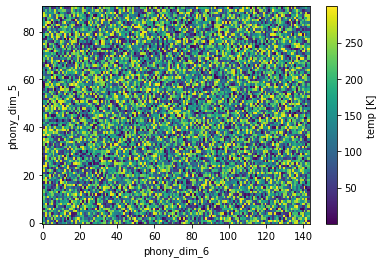

In [38]:
temp.isel(phony_dim_3=1, phony_dim_4=2).plot(x="phony_dim_6", 
                                             y="phony_dim_5")

#### Decoding data

- There is no (real) automatism for decoding data like this could be done for NetCDF files. 
- If you have a integer compressed 2d variable (dataset) `var` with some attributes `gain` and `offset` you can add the NetCDF specific attributes `scale_factor` and `add_offset` to the variable:

In [ ]:
var_name = ''
var = xds[var_name]
var.attrs['scale_factor'] = var.attrs.get('gain')
var.attrs['add_offset'] = var.attrs.get('offset')
ds = xarray.decode_cf(xds)

This will decode your variable using netcdf mechanisms.

- You could try to give the extracted dimension useful names (you will get something like phony_dim_0, phony_dim_1, ..., phony_dim_N) and assign new (as in example) or existing variables/coordinates to those dimensions to gain as much of the xarray machinery:

In [ ]:
var = xds[var_name]
var.attrs['scale_factor'] = var.attrs.get('gain')
var.attrs['add_offset'] = var.attrs.get('offset')
dims = var.dims
xds[var_name] = var.rename({dims[0]: 'x', dims[1]: 'y'})
xds = xds.assign({'x': (['x'], xvals, xattrs)})
xds = xds.assign({'y': (['y'], yvals, yattrs)})
ds = xarray.decode_cf(xds)